In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\hayze\optimus\Documents\Stock_prices\Datasets/BAJFINANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [5]:
df.set_index('Date', inplace = True)

<Axes: xlabel='Date'>

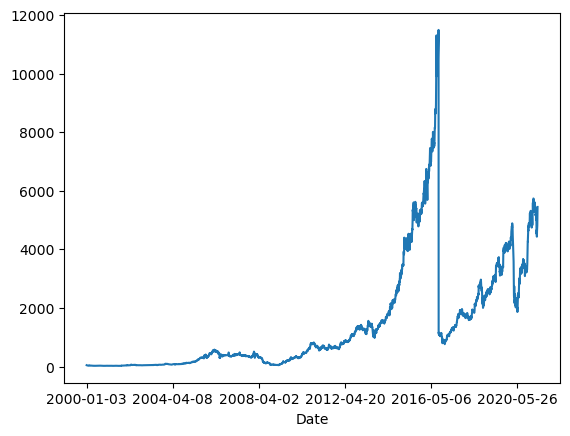

In [6]:
df['VWAP'].plot()

In [67]:
# Data preprocessing

In [7]:
df.shape

(5235, 14)

In [8]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [9]:
df.dropna(inplace= True)

In [10]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [11]:
df.shape

(2456, 14)

In [12]:
data = df.copy()

In [13]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [14]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
lag_features = ['High','Low', 'Volume','Turnover','Trades'].corr()


In [59]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [16]:
for feature in lag_features:
    data[feature+'rolling_mean_3']= data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']= data[feature].rolling(window=window2).mean()

In [17]:
for feature in lag_features:
    data[feature+'rolling_std_3']= data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']= data[feature].rolling(window=window2).std()

In [18]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [19]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [20]:
data.shape

(2456, 34)

In [21]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [24]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [25]:
training_data = data[0:1800]
test_data = data[1800:]

In [26]:
test_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,3357660,...,44.330125,63.787942,56.544592,53.608580,1.130645e+06,8.164109e+05,2.905375e+14,2.170264e+14,40756.099335,32012.681782
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,2682340,...,51.662632,51.914260,40.110047,66.236890,9.025933e+05,8.351259e+05,2.325644e+14,2.156391e+14,31297.267202,34656.587966
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.0,2672.20,2651.42,1795131,...,23.795710,47.776811,55.315527,61.033875,7.836553e+05,8.007301e+05,2.018671e+14,2.036245e+14,31471.093038,33742.606344
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.0,2604.60,2613.75,1455320,...,23.275363,44.294307,55.950343,57.040858,6.335337e+05,8.189293e+05,1.593010e+14,2.094265e+14,35128.684296,34854.254176
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.4,2570.40,2597.61,1449290,...,28.146507,47.625517,33.719740,50.588419,1.979536e+05,7.800295e+05,5.634743e+13,2.006348e+14,10189.437390,32916.577887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,BAJFINANCE,EQ,4667.80,4690.00,4829.00,4690.00,4744.0,4736.55,4768.93,2903989,...,57.895423,100.937586,92.412909,101.918120,1.702426e+05,4.526482e+05,9.854265e+13,1.971550e+14,6355.277807,34072.377769
2021-04-27,BAJFINANCE,EQ,4736.55,4747.00,4889.85,4746.55,4886.0,4865.05,4818.15,2644997,...,65.069661,122.508067,68.346854,125.513117,1.320729e+05,4.596807e+05,6.236197e+13,1.978308e+14,13647.018368,36580.198796
2021-04-28,BAJFINANCE,EQ,4865.05,4915.00,5310.00,4915.00,5255.0,5280.90,5158.33,8576454,...,261.912754,249.749375,117.045792,178.678934,3.352266e+06,2.156827e+06,1.787390e+15,1.162555e+15,176288.276474,111832.000690


In [27]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+11,1.136003e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982094e+11,1.123423e+12,557.373603,464.778596
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,15088.183102,13139.472184,9.595224e+11,8.397765e+11,656.385050,455.234163
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,4575.812970,12469.137006,2.733211e+11,7.983186e+11,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,...,88.954937,79.489416,83.341306,107.041856,696998.737787,642979.884199,1.827289e+14,1.673270e+14,2794.744413,21708.856675
2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,...,63.129081,100.594924,24.113551,119.854378,483305.554092,570427.041296,1.375623e+14,1.467744e+14,21770.352164,17267.163548
2018-09-06,BAJFINANCE,EQ,2716.90,2729.00,2731.50,2671.40,2672.20,2684.10,2695.89,1147879,...,23.818183,113.135709,8.146779,118.187686,734609.476628,584307.816124,2.020435e+14,1.561692e+14,30923.312263,24013.596897


In [28]:
#installing Pmdarima

In [49]:
!pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 262.6 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/614.7 kB 195.7 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/614.7 kB 252.2 kB/s eta 0:00:03
   ---- ---------------------------------- 71.7/614.7 kB 261.4 kB/s eta 0:00:03
   ------ ------------------------------- 112.6/614.7 kB 327.2 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/614.7 kB 355.0 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/614.7 kB 339.7 kB/s eta 0:00:02
   ------------ ------------------------- 194.6/614.7 kB 393.0 kB/s eta 0:00:02
   ------------ ------------------------- 204.8/614.7 kB 377.1 kB/s eta 0:00:02
   ------------- ------------------------ 225.3/614.7 kB 393.1 kB

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
from pmdarima import auto_arima

In [130]:
model= auto_arima(y=training_data['VWAP'], X = training_data[ind_features], trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.542, Time=9.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.228, Time=5.92 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.352, Time=6.28 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.324, Time=7.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=5.90 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.238, Time=8.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 43.177 seconds


In [131]:
model.fit(y=training_data['VWAP'], X=training_data[ind_features])


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [132]:
test_data[ind_features].shape

(650, 20)

In [133]:
forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])

In [134]:
forecast

1800    2600.732684
1801    2625.147876
1802    2600.996129
1803    2556.412399
1804    2572.872101
           ...     
2445    4392.702577
2446    4496.727447
2447    4990.815694
2448    5292.116450
2449    5687.512017
Length: 650, dtype: float64

In [136]:
forecast_array = forecast.values  # Convert Pandas Series to NumPy array


In [137]:
test_data["Predicted_VWAP"] = forecast.values  # Store predictions in test data


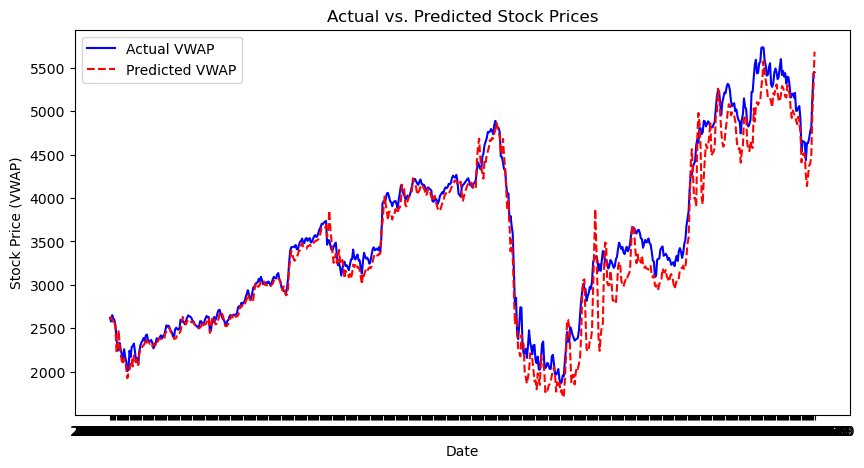

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data["VWAP"], label="Actual VWAP", color='blue')
plt.plot(test_data.index, test_data["Predicted_VWAP"], label="Predicted VWAP", color='red', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price (VWAP)")
plt.legend()
plt.title("Actual vs. Predicted Stock Prices")
plt.show()


In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_time_series_model(test_data, forecast):
    
    test_data, forecast = np.array(test_data), np.array(forecast)

    mae = mean_absolute_error(test_data, forecast)
    mse = mean_squared_error(test_data, forecast)
    rmse = np.sqrt(mse)
    
    
    mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100  # Avoid division by VWAP
    
    r2 = r2_score(test_data, forecast)

    print(f" Model Evaluation Results:")
    print(f" Mean Absolute Error (MAE): {mae:.2f}")
    print(f" Mean Squared Error (MSE): {mse:.2f}")
    print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f" Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f" R-squared (R² Score): {r2:.2f}")

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R²": r2}


results = evaluate_time_series_model(test_data['VWAP'], forecast)


 Model Evaluation Results:
 Mean Absolute Error (MAE): 160.30
 Mean Squared Error (MSE): 49288.75
 Root Mean Squared Error (RMSE): 222.01
 Mean Absolute Percentage Error (MAPE): 4.63%
 R-squared (R² Score): 0.95
